In [2]:

# !pip install -q hfda
# import hfda
import mxnet as mx
import pandas as pd
import numpy as np
from gluonts.dataset.common import ListDataset
import os
os.environ['MXNET_USE_FUSION'] = '0'
import matplotlib.pyplot as plt
from gluonts.mx.distribution.student_t import StudentTOutput
from gluonts.mx import Trainer
import warnings
from gluonts.evaluation import Evaluator
import json
warnings.filterwarnings('ignore')
import copy
import torch
from gluonts.evaluation import make_evaluation_predictions
#Global Estimators - Multivariate !
from gluonts.model.deepvar import DeepVAREstimator
from gluonts.model.gpvar import GPVAREstimator
from gluonts.model.lstnet import LSTNetEstimator
from gluonts.model.tpp import DeepTPPEstimator
#Global Estimators - Hierarchical
from gluonts.model.deepvar_hierarchical import DeepVARHierarchicalEstimator
# Global Estimators - Univariate !
from gluonts.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.model.deepar import DeepAREstimator
from gluonts.model.deepstate import DeepStateEstimator
from gluonts.model.deep_factor import DeepFactorEstimator
from gluonts.model.renewal import DeepRenewalProcessEstimator
from gluonts.model.gp_forecaster import GaussianProcessEstimator
from gluonts.model.rotbaum import TreeEstimator
from gluonts.model.wavenet import WaveNetEstimator
from gluonts.model.n_beats import NBEATSEnsembleEstimator,NBEATSEstimator
from gluonts.model.tft import TemporalFusionTransformerEstimator
from gluonts.model.transformer import TransformerEstimator
from gluonts.model.seq2seq import MQCNNEstimator,MQRNNEstimator,RNN2QRForecaster,Seq2SeqEstimator
# Local Estimators - Univariate!
from gluonts.model.r_forecast import RForecastPredictor
from gluonts.model.prophet import ProphetPredictor
from gluonts.model.seasonal_naive import SeasonalNaiveEstimator
from gluonts.model.naive_2 import Naive2Predictor
from gluonts.model.npts import NPTSEstimator
# Must define the context_length (how much we are looking back),prediction_length(how much to the future we're predicting)
# and They MUST (MUST I TELL YOU!) == series_length
context_length =15  
prediction_length = 5
series_length = 20


/opt/conda/envs/rapids/lib/python3.7/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [60]:
## Default parameter for each model: 

#Works perfectly
# estimator_model = DeepAREstimator(freq=freq,
#                               context_length=8,
#                               prediction_length=4,
#                               distr_output=StudentTOutput(),
#                               trainer=Trainer(epochs=20,
#                                               learning_rate=1e-3,
#                                               num_batches_per_epoch=30,
#                                              patience=10))

#Works perfectly
# estimator_model = DeepStateEstimator(
#             freq = "1H",
#             num_layers=2,
#             num_cells=40,
#             past_length=15,
#             prediction_length=5,
#             # distr_output = StudentTOutput(),
#             use_feat_static_cat = False,
#             cardinality = [0],
#             dropout_rate=0.1,
#             trainer=Trainer(epochs=20,
#                learning_rate=1e-3,
#                num_batches_per_epoch=30,
#                patience=10))

#Kills Kernel
# estimator_model = DeepFactorEstimator(
#             freq = "1H",
#             context_length=15,
#             prediction_length=5,
#             distr_output = StudentTOutput(),
#             trainer=Trainer(epochs=20,
#                learning_rate=1e-3,
#                num_batches_per_epoch=30,
#                patience=10))
 
# Not Working Properly - Get stuck
# estimator_model = DeepRenewalProcessEstimator(
#             freq = "1H",
#             num_cells=40,
#             num_layers = 2,
#             context_length=15,
#             prediction_length=5,
#             trainer=Trainer(epochs=20,
#                learning_rate=1e-3,
#                num_batches_per_epoch=30,
#                patience=10))

#Works perfectly
# estimator_model = GaussianProcessEstimator(
#             freq = "1H",
#             context_length=15,
#             cardinality = 1,
#             prediction_length=5,
#             trainer=Trainer(epochs=20,
#                learning_rate=1e-3,
#                num_batches_per_epoch=30,
#                patience=10))
#Works perfectly
# estimator_model = NBEATSEstimator(
#             freq = "1H",
#             context_length=15,
#             prediction_length=5,
#             trainer=Trainer(epochs=10,
#                learning_rate=1e-3,
#                num_batches_per_epoch=30,
#                patience=10))
#Works perfectly
# estimator_model = NBEATSEnsembleEstimator(
#             freq = "1H",
#             prediction_length=5,
#             trainer=Trainer(epochs=10,
#                learning_rate=1e-3,
#                num_batches_per_epoch=30,
#                patience=10))

#This method is RotBaum method its confusing that the estimator is TreeEstimator
#Works perfectly
# estimator_model  = TreeEstimator(freq = "1H",
#             prediction_length=5,)

#Training works but problem with the plotting
# estimator_model = estimator = TemporalFusionTransformerEstimator(
#     freq = "1H",
#     context_length=15,
#     prediction_length = 5,
#     trainer=Trainer(epochs=20,
#                learning_rate=1e-3,
#                num_batches_per_epoch=30,
#                patience=10),
#     hidden_dim=32,
#     variable_dim=8, # this is the dimension of variable encodings; in the original paper it is always `hidden_dim`
#     num_heads=4,
#     num_outputs=3, # number of quantiles to be predicted. E.g. [0.5,0.1,0.9] for `num_outputs=3` and [0.5,0.1,0.9,0.2,0.8] for `num_outputs=5`
#     num_instance_per_series=100,
#     dropout_rate=0.1)

#Works perfectly
# estimator_model = TransformerEstimator(
#     freq = "1H",
#     context_length=15,
#     prediction_length = 5,
#     trainer=Trainer(epochs=20,
#                learning_rate=1e-3,
#                num_batches_per_epoch=30,
#                patience=10),
#     num_heads=4,
#     dropout_rate=0.1)

#Works but something is off - metrics seems good but plot not so much need to check
# estimator_model = WaveNetEstimator(freq = "1H",
#     prediction_length = 5,
#     trainer=Trainer(epochs=20,
#                learning_rate=1e-3,
#                num_batches_per_epoch=30,
#                patience=10))    

#Works perfectly
# estimator_model = SimpleFeedForwardEstimator(freq = "1H",
#     prediction_length = 5,
#     trainer=Trainer(epochs=20,
#                learning_rate=1e-3,
#                num_batches_per_epoch=30,
#                patience=10)) 

# !pip install rpy2 - Need to download R and add to path (otherwise wont work cuz its a wrapped r package)
# estimator_model = RForecastPredictor(freq = "1H",
#     prediction_length = 5) 

# Import failed - Need to check
# !pip install fbprophet
# !pip install gluonts[Prophet]
# estimator_model = ProphetPredictor(freq = "1H",
#     prediction_length = 5)

#Works - Weird constant predictions - need to check
# estimator_model = SeasonalNaiveEstimator(freq = "1H",
#     prediction_length = 5) 

#Train method is different based on numpy - need to investigate
# estimator_model = Naive2Predictor(freq = "1H",
    # prediction_length = 5)

#Works - but need further investigation
# estimator_model = NPTSEstimator(freq = "1H",
#     prediction_length = 5)

#Training Works Problem with Plots (Same as TFT)
# estimator_model = MQCNNEstimator(freq = "1H",
#     prediction_length = 5,
#     trainer=Trainer(epochs=10,
#                learning_rate=1e-3,
#                num_batches_per_epoch=30,
#                patience=10)) 


#MXNetError: Traceback (most recent call last):
#  File "../src/operator/./rnn-inl.h", line 1050
#cuDNN: Check failed: e == CUDNN_STATUS_SUCCESS (9 vs. 0) : CUDNN_STATUS_NOT_SUPPORTED
#Cuda problem
# estimator_model = MQRNNEstimator(freq = "1H",
#     prediction_length = 5,
#     trainer=Trainer(epochs=10,
#                learning_rate=1e-3,
#                num_batches_per_epoch=30,
#                patience=10)) 

#Parameters are good but need to understand the architecture in order to set correct dimenstions - Need to check further
# estimator_model = RNN2QRForecaster(freq = "1H",
#                                    cardinality =[1],
#                                    embedding_dimension=40,
#                                    encoder_rnn_layer=2,
#                                    encoder_rnn_num_hidden= 40,
#                                    decoder_mlp_layer= [2],
#                                    decoder_mlp_static_dim=3,               
#     prediction_length = 5,
#     trainer=Trainer(epochs=10,
#                learning_rate=1e-3,
#                num_batches_per_epoch=30,
#                patience=10)) 


#Seq2Seq - Didnt check
#Multivariate - Didnt check


### Read Data

In [61]:
import pandas as pd
df = pd.read_csv('./30_2020_2022.csv',nrows=30000)
df.head()

,ts,30AT_8505,30FC_2150PV,30FIT_2068PV,30FT_3677,30P8_015IT-MPR,30P8_016IT-MPR,30P8_017IT-MPR,30P8_018IT-MPR,30P8_019IT-MPR,...,LR03001401L%SO4,LT_417,LT_418,M010200001,M010200617,P8_023IT,P8_024IT,P8_501IT,WC_3406V,WT_3406_DRY
0,01/01/2020 00:00,27.782553,0.778241,0.0,308.110443,40.666660,54.863071,73.101166,80.868477,57.792770,...,5.48,63.199207,88.784744,6.9,30.299999,58.196373,58.433006,57.342472,6.821104,90.978668
1,01/01/2020 00:01,29.201120,0.778370,0.0,308.338531,40.515007,54.996876,68.655632,83.157829,58.628803,...,5.48,63.083141,88.788826,6.9,30.299999,56.216068,58.665119,58.039780,6.972968,90.883301
2,01/01/2020 00:02,29.977579,0.778499,0.0,308.966797,41.475361,55.510670,68.336914,83.256401,61.251297,...,5.48,62.967075,88.792908,6.9,30.299999,58.859699,57.134136,54.327690,7.124832,90.739807
3,01/01/2020 00:03,29.977434,0.778628,0.0,309.347809,41.571854,54.448219,69.142357,85.168121,56.712765,...,5.48,62.851009,88.796997,6.9,30.299999,56.892944,58.512897,56.815121,7.276696,90.523300
4,01/01/2020 00:04,29.703476,0.778757,0.0,309.537109,41.251049,55.990276,69.582130,82.192314,58.562035,...,5.48,62.734947,88.801079,6.9,30.299999,57.301258,58.540520,57.980095,7.428560,89.407349


## Functions and Utils

In [62]:
## After eating - build a function that receives a dataframe with 2 cols (target,ts) and creates a set of series out of it
## of size context_length + prediction_length
## then build a function that extracts each series with its corrosponding starting date
## Then create a ListDataset suitable for gluonTS
def sliding_window_uni(df, window_size, stride,target_col):
    # Copy and extract relevant columns
    data = df.copy(deep=True)
    train = data[target_col]
    ts = data["ts"]
    # Reset indices
    train = train.reset_index(drop=True)
    ts = ts.reset_index(drop=True)
    # Transform to numpy and set ts to datetime format
    train = train.to_numpy()
    ts = pd.to_datetime(ts)
    # Create sub-series using rolling windows of our data
    train_list = []
    ts_list = []
    for i in range(0, len(data), stride):
        if i + window_size < len(data):
            train_list.append(train[i:i+window_size])
            ts_list.append(ts[i])
        else:
            return torch.tensor(train_list),(ts_list)

##select changepoints only
def retrieve_changepoints_ts(df,cols_to_check):
    import copy
    df = copy.deepcopy(df)
    df["ts"] = df.index
    cp_dict = {}
    if cols_to_check is not None:
        for col in cols_to_check:
            cp = np.where((df[col].shift(-1)==df[col])&(df[col].shift(1)!=df[col]))[0]
            cp_dict[col] = cp
            cp_dict["ts"] = df["ts"].iloc[cp]
    else:
        print("Please specify the columns as a list ...")
    return cp_dict

def retrieve_forecasts(ds,predictor,num_samples:int):
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=ds,  # dataset
        predictor=predictor,  # predictor
        num_samples=num_samples,  # number of sample paths we want for evaluation (Monte Carlo Paths)
    )
    return list(forecast_it),list(ts_it)

def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = context_length + prediction_length
    prediction_intervals = (50.0,10.0,90.0)
    legend = ["ground truth", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(18, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='cadetblue')
    plt.axvline(forecast_entry.start_date, color='g', lw=1) # end of train dataset
    plt.grid(which="major")
    plt.legend(legend, loc="upper left")
    plt.show();
    

In [63]:
def preprocessing_wrapper_univariate(df:pd.DataFrame,
                                     target:str,
                                     ratio:float,
                                     series_length:int,
                                     strides:int,
                                     prediction_length:int,
                                    context_length:int,
                                     freq:str,
                                     estimator_model = None):
    # Assert
    assert (prediction_length + context_length == series_length),"Prediction length + context_length should equal series_length"
    # Copy df and retrieve only change points
    df = copy.deepcopy(df)
    cp = retrieve_changepoints_ts(df,[target])
    df = df.iloc[cp[target]]
    df.reset_index(drop=True,inplace=True)
    #Preprocess univariate data
    train,ts = sliding_window_uni(df,series_length,strides,target)
    #Split to train-test
    split_point = int(np.floor(len(train)*ratio))
    train_data ,ts_train = train[:split_point].numpy(),ts[:split_point]
    test_data,ts_test = train[split_point:].numpy(),ts[split_point:]
    #prepare dict entries
    data_list_train = [{"start": ts_train[i], "target": train_data[i]} for i in range(0,len(train_data))]
    data_list_val = [{"start": ts_test[i], "target": test_data[i]} for i in range(0,len(test_data))]
    #Transform to suitable format
    train_ds  = ListDataset(data_iter=data_list_train,freq=freq)
    val_ds  = ListDataset(data_iter=data_list_val,freq=freq)
    if estimator_model is None:
        estimator = DeepAREstimator(freq=freq,
                               context_length=8,
                               prediction_length=4,
                               distr_output=StudentTOutput(),
                               trainer=Trainer(epochs=10,
                                               learning_rate=1e-3,
                                               num_batches_per_epoch=30,
                                               patience=10))
    else:
        estimator = estimator_model
    
    

    predictor = estimator.train(train_ds)
    return predictor,estimator,train_ds,val_ds
    


In [64]:
#Train function
predictor,estimator,train_ds,val_ds = preprocessing_wrapper_univariate(df,"LR03001401L%SO4",0.85,20,1,5,15,"1H",estimator_model)
# Retrieve Forecasts
forecasts,tss = retrieve_forecasts(val_ds,predictor,100)
# plot 10 first examples
# Implement here a random list generator both consecutive(generate single num and run it til +x) and completely random
for i in range(10):
    plot_prob_forecasts(tss[i], forecasts[i])
#Evaluation Metrics
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(tss, forecasts)
print(json.dumps(agg_metrics, indent=4))

  0%|          | 0/30 [00:00<?, ?it/s]

infer_shape error. Arguments:
  data0: (32, 5)
  data1: (32, 5)
  data2: (32, 1)
  data3: (32, 5, 4)
  data4: (32, 5, 4)


ValueError: Deferred initialization failed because shape cannot be inferred. Traceback (most recent call last):
  File "../src/c_api/c_api_symbolic.cc", line 539
MXNetError: InferShapeKeyword argument name data4 not found.
Candidate arguments:
	[0]data1
	[1]data0
	[2]data2
	[3]featureembedder2_cat_0_embedding_weight
	[4]data3
	[5]rnnencoder2_rnn0_lstm0_l0_i2h_weight
	[6]rnnencoder2_rnn0_lstm0_l0_h2h_weight
	[7]rnnencoder2_rnn0_lstm0_r0_i2h_weight
	[8]rnnencoder2_rnn0_lstm0_r0_h2h_weight
	[9]rnnencoder2_rnn0_lstm0_l1_i2h_weight
	[10]rnnencoder2_rnn0_lstm0_l1_h2h_weight
	[11]rnnencoder2_rnn0_lstm0_r1_i2h_weight
	[12]rnnencoder2_rnn0_lstm0_r1_h2h_weight
	[13]rnnencoder2_rnn0_lstm0_l0_i2h_bias
	[14]rnnencoder2_rnn0_lstm0_l0_h2h_bias
	[15]rnnencoder2_rnn0_lstm0_r0_i2h_bias
	[16]rnnencoder2_rnn0_lstm0_r0_h2h_bias
	[17]rnnencoder2_rnn0_lstm0_l1_i2h_bias
	[18]rnnencoder2_rnn0_lstm0_l1_h2h_bias
	[19]rnnencoder2_rnn0_lstm0_r1_i2h_bias
	[20]rnnencoder2_rnn0_lstm0_r1_h2h_bias
	[21]oneshotdecoder1_dense0_weight
	[22]oneshotdecoder1_dense0_bias
	[23]oneshotdecoder1_mlp0_dense0_weight
	[24]oneshotdecoder1_mlp0_dense0_bias
	[25]seq2seqtrainingnetwork1_projectparams0_dense0_weight
	[26]seq2seqtrainingnetwork1_projectparams0_dense0_bias



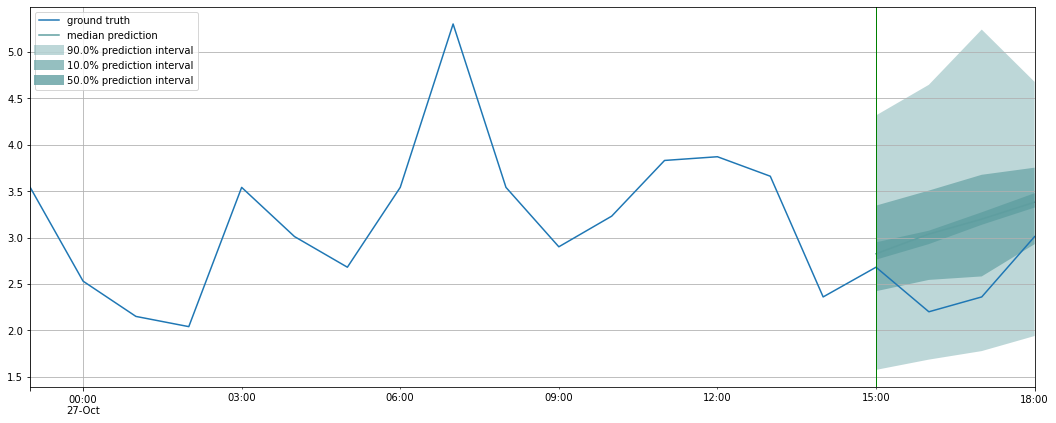

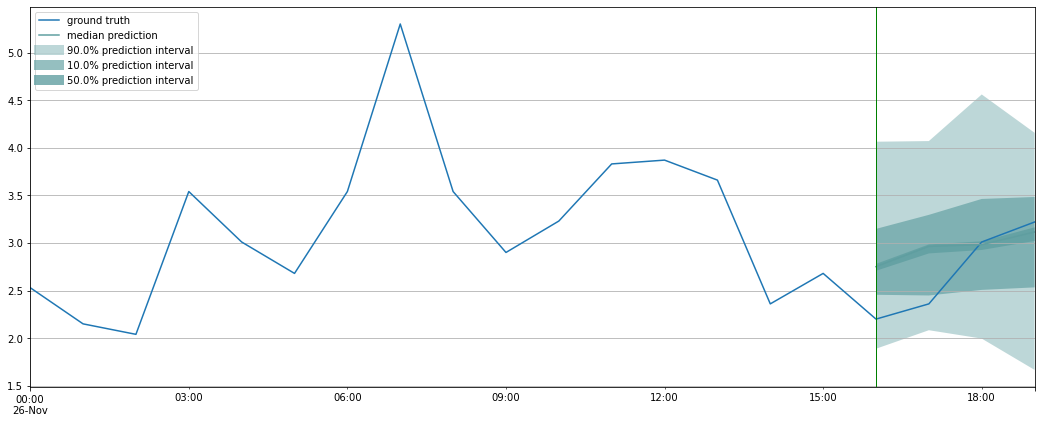

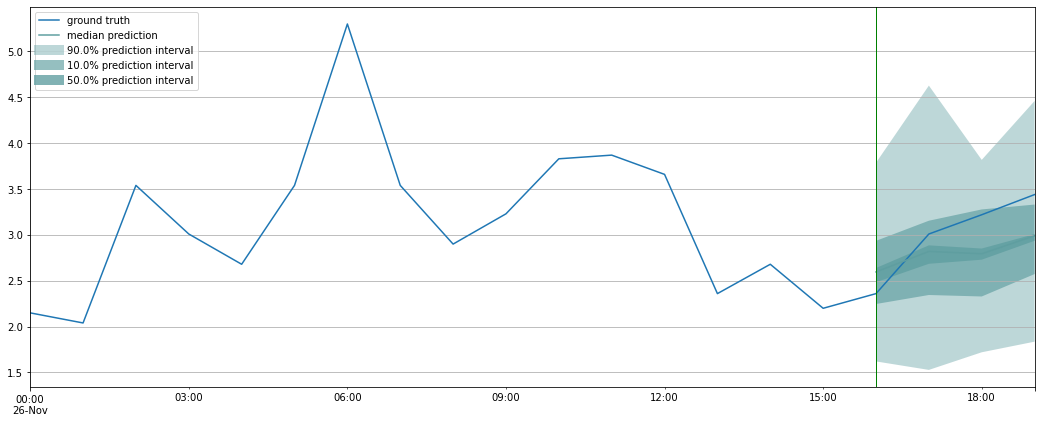

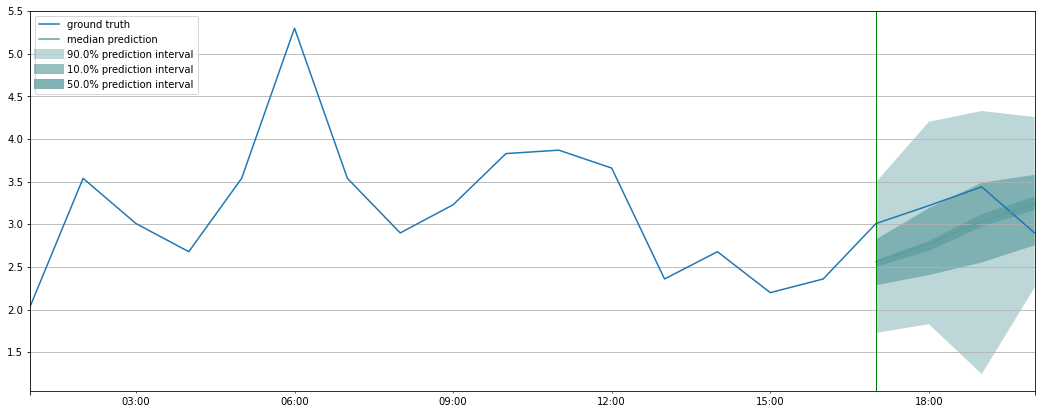

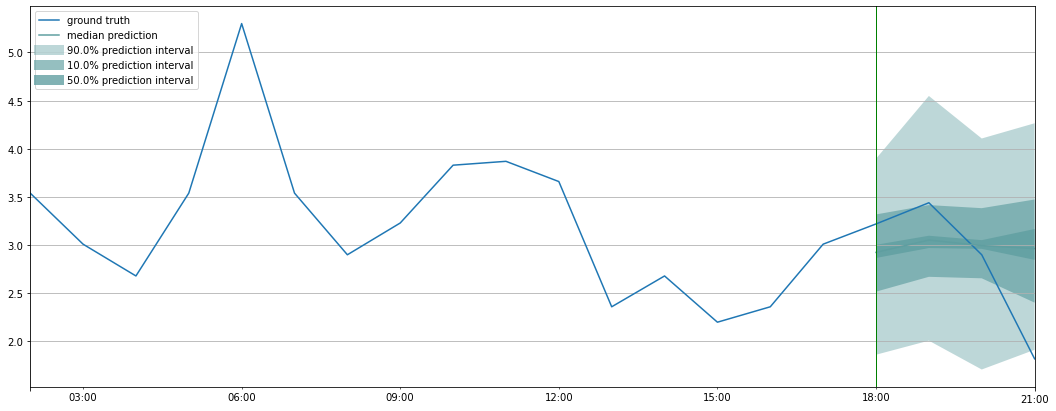

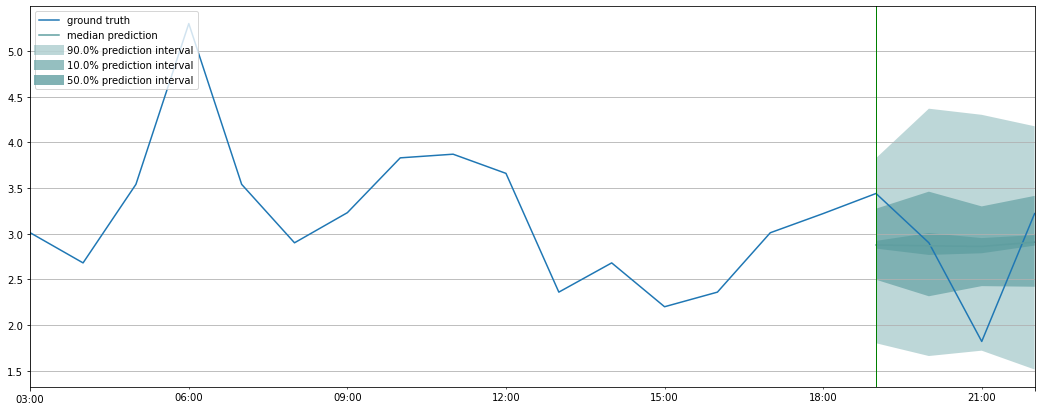

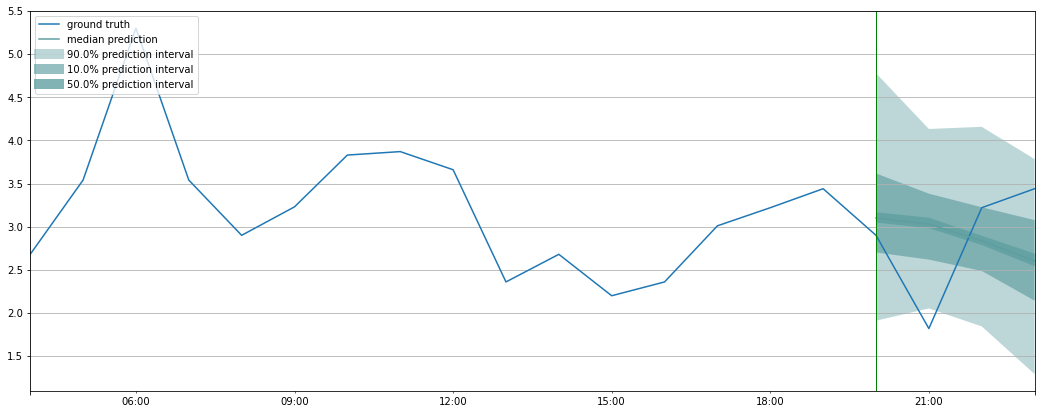

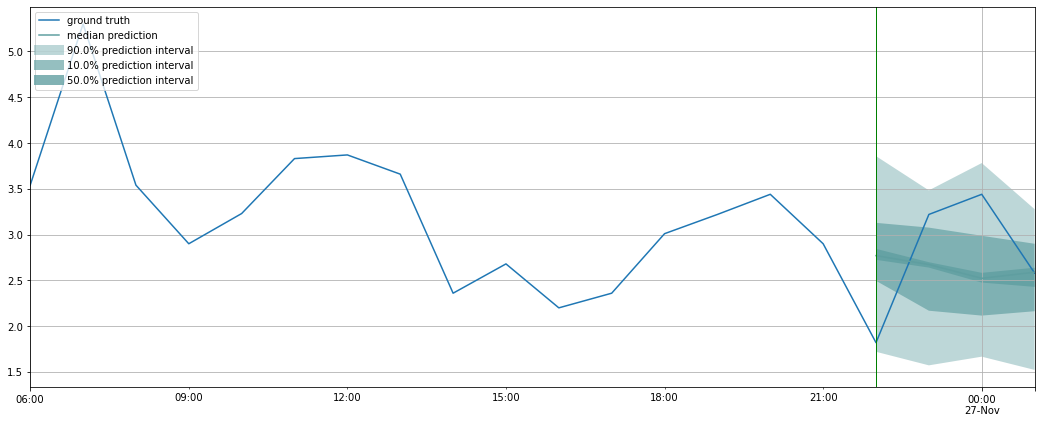

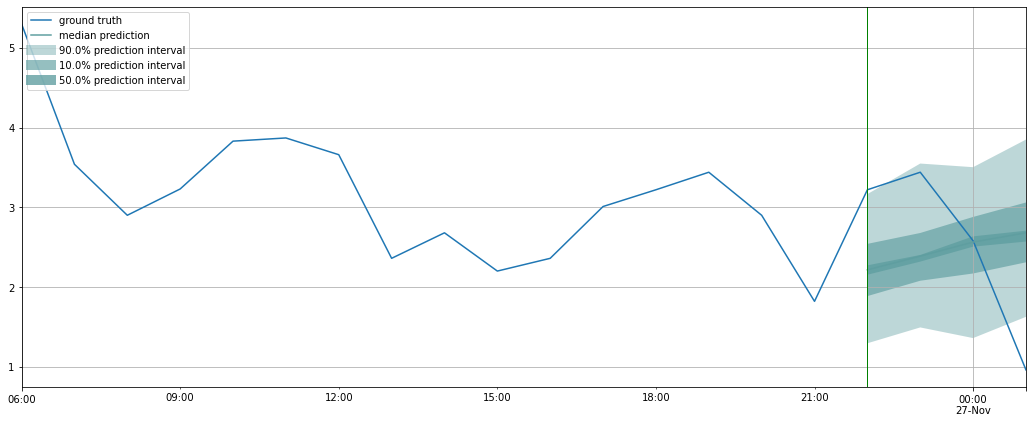

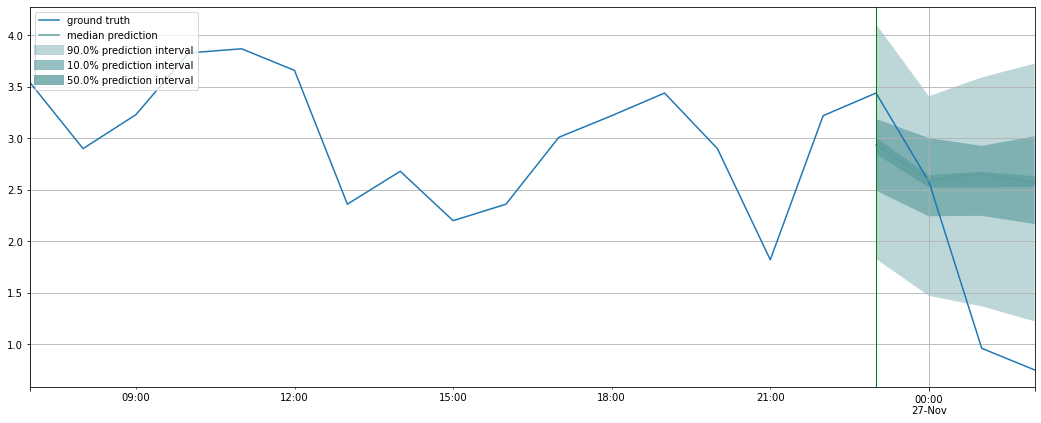

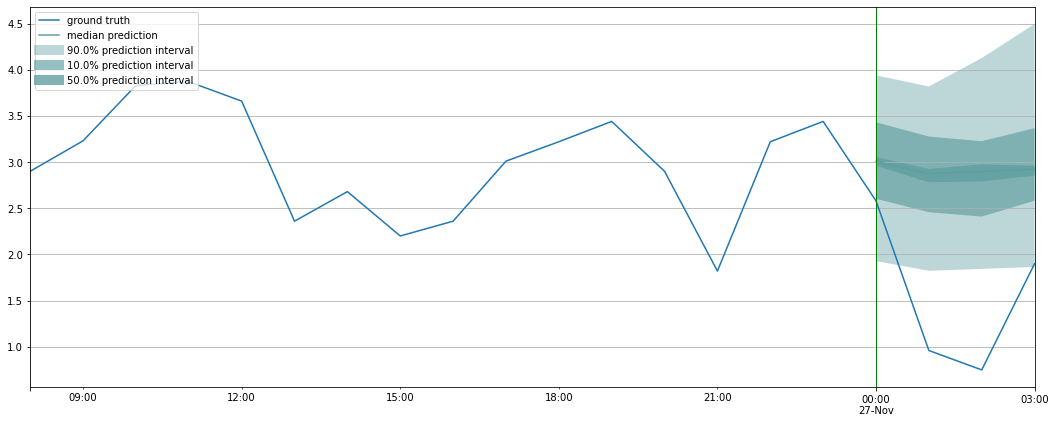

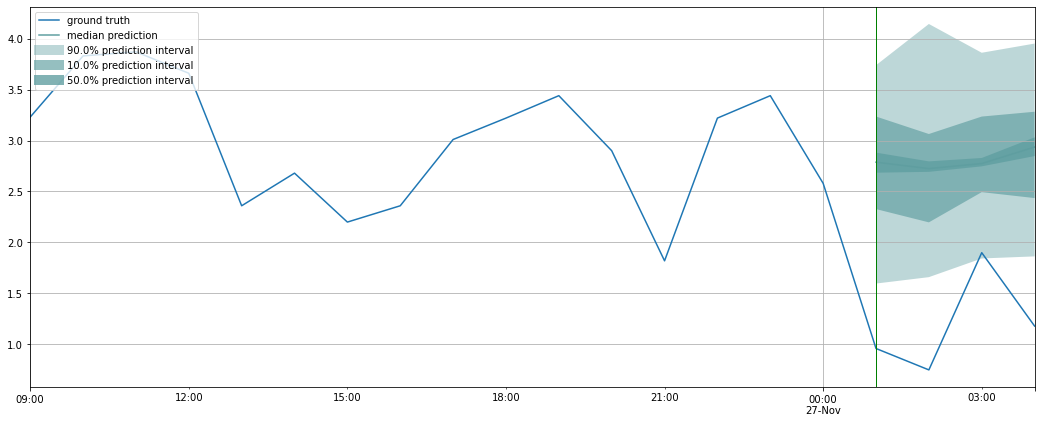

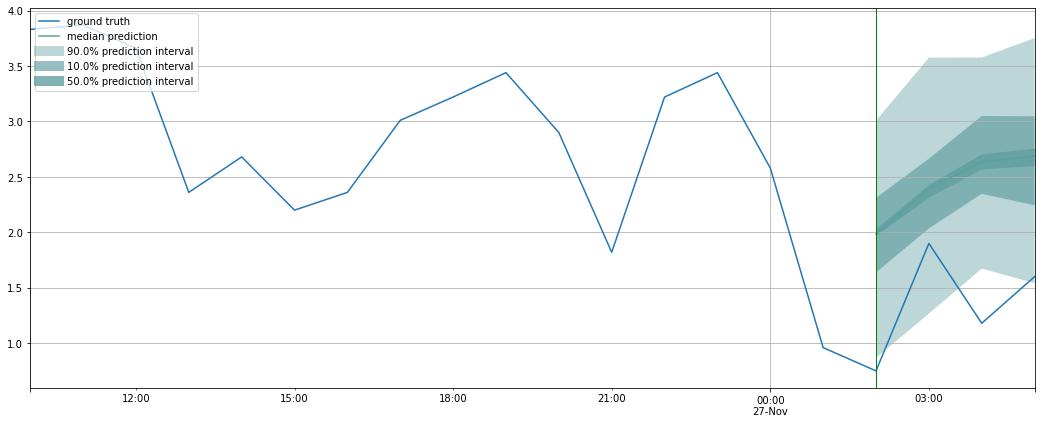

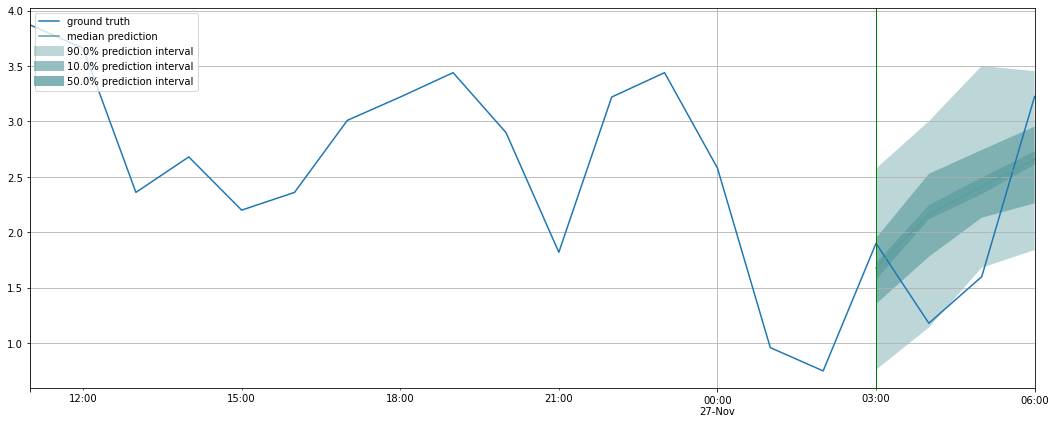

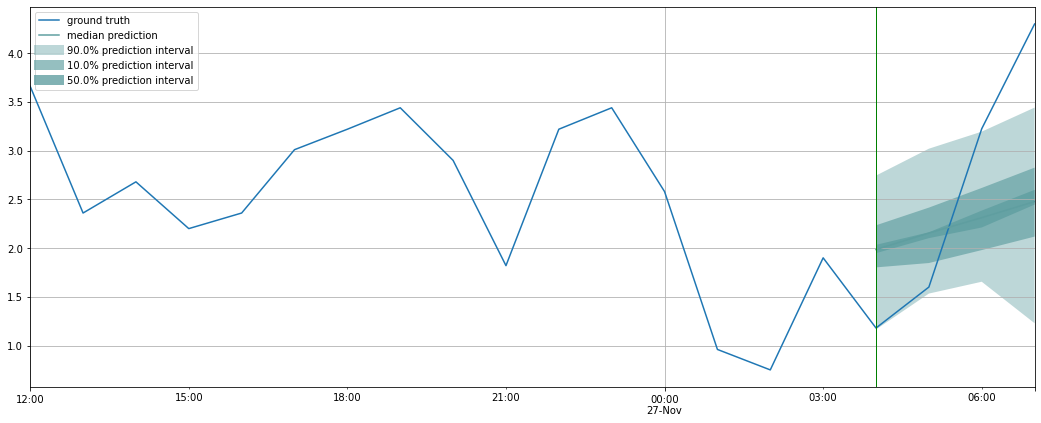

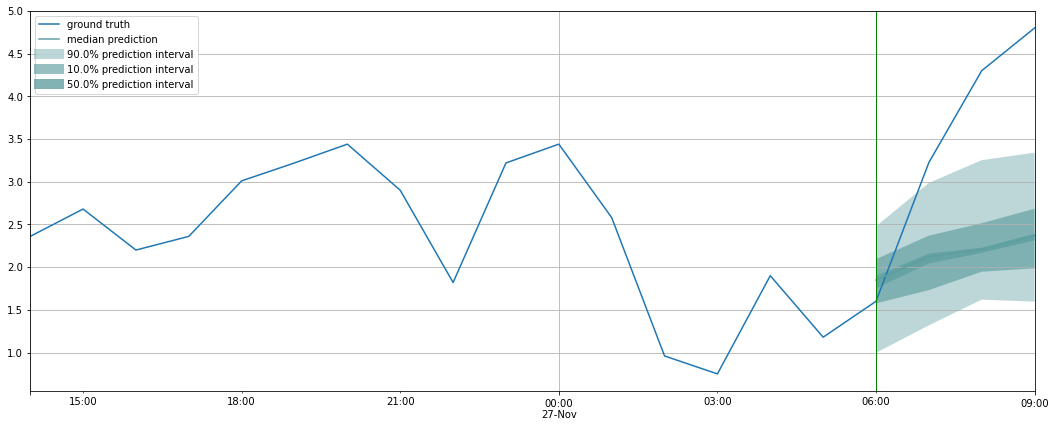

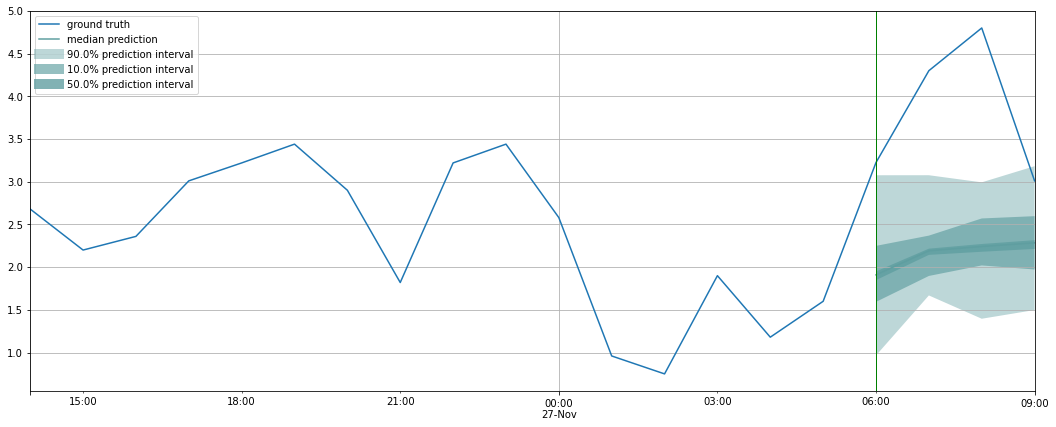

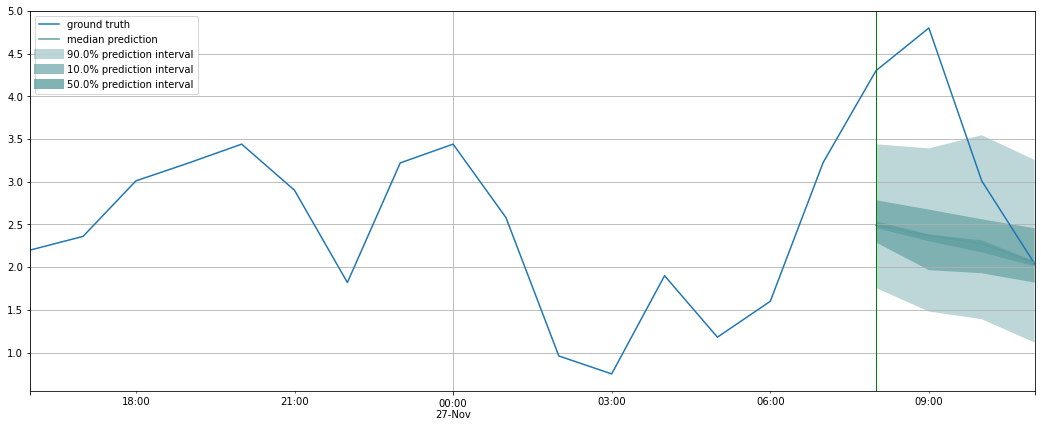

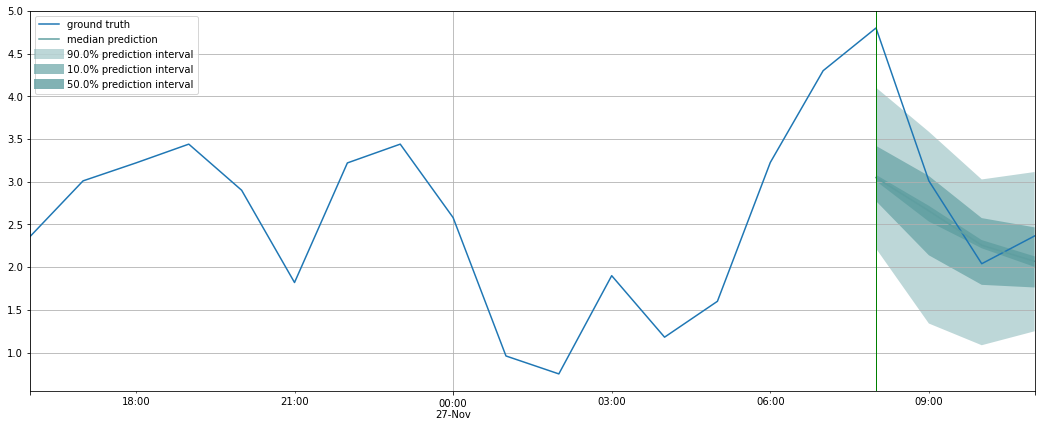

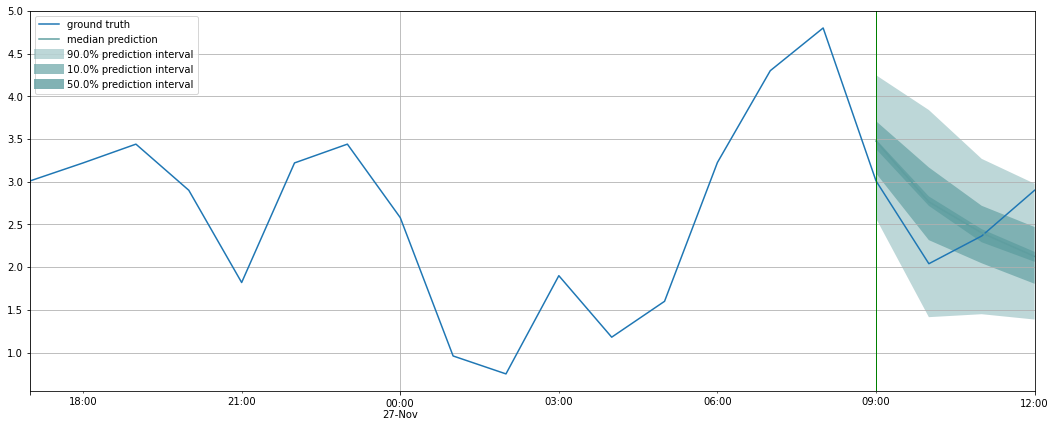

In [60]:
for i in range(10,30):
    plot_prob_forecasts(tss[i], forecasts[i])

In [ ]:



    ##load data
    if test_mode==1:
        df = pd.read_csv(datafile,parse_dates=ts_column,nrows=75000)
    else:
        df = pd.read_csv(datafile,parse_dates=ts_column)
    if verbose==1:
        print(f'data contains {df.shape[0]} records and {df.shape[1]-2} features')
    df.set_index(ts_column)
    cp = retrieve_changepoints_ts(df,[target])
    print(cp)
    # df_cp = df[df[cp[target]]
    print(df_cp)
    if verbose==1:
        print(f'data contains {len(cp[target])} change points')
    # Split to train and validation 
    train_indices = cp[target][:int(np.floor(len(cp[target])*0.8))]
    validation_indices = cp[target][int(np.floor(len(cp[target])*0.8)):]    
    # Set starting dates for both train and validation
    if start_date is None:
        start_date_train=df[ts_column].min().values[0]
        start_date_val = df[ts_column].iloc[validation_indices.min()].values[0]
        print(f"Train start date is {start_date_train}")
        print(f"Validation start date is {start_date_val}")
    # Create seperate ds for train and validation
    train_indices = cp[target][:int(np.floor(len(cp[target])*0.8))]
    validation_indices = cp[target][int(np.floor(len(cp[target])*0.8)):]
    train_uni = df[target].iloc[train_indices].reset_index(drop=True)
    val_uni = df[target].iloc[validation_indices].reset_index(drop=True)
    print(f"Training data is of size {len(train_uni)}")
    print(f"Validation data is of size {len(val_uni)}")
    
    data_list_train = [{"start": df_cp[ts_columns].iloc[window], "target": train_uni[window:window+window_size].values} for window in range(0,len(train_uni)-prediction_length)]
    data_list_val = [{"start": df_cp[ts_columns].iloc[len(train_indices)+window], "target": val_uni[window:window+window_size].values} for window in range(0,len(val_uni)-prediction_length)]

    # data_list_train = [{"start": start_date_train, "target": train_uni.values} for c in df.columns]
    # data_list_val = [{"start": start_date_val, "target": val_uni.values} for c in df.columns]

    train_ds  = ListDataset(data_iter=data_list_train,freq=freq)
    val_ds  = ListDataset(data_iter=data_list_val,freq=freq)
    # Define estimator
    estimator = DeepAREstimator(freq=freq,
                           context_length=context_length,
                           prediction_length=prediction_length,
                           distr_output=StudentTOutput(),
                           trainer=Trainer(epochs=15,
                                           learning_rate=1e-3,
                                           num_batches_per_epoch=100,
                                           patience=10))

    predictor = estimator.train(train_ds)
    
    return estimator, predictor, train_ds ,val_ds


In [61]:
# !pip install -q hfda
# import hfda

import mxnet as mx
import pandas as pd
import numpy as np
from gluonts.dataset.common import ListDataset
import os
os.environ['MXNET_USE_FUSION'] = '0'

from gluonts.model.deepar  import DeepAREstimator
from gluonts.mx.distribution.student_t import StudentTOutput
from gluonts.mx import Trainer
import warnings
from gluonts.evaluation import Evaluator
import json
warnings.filterwarnings('ignore')
freq="1H"
context_length=100
prediction_length=24

##select changepoints only
def retrieve_changepoints_ts(df,cols_to_check):
    import copy
    df = copy.deepcopy(df)
    df["ts"] = df.index
    cp_dict = {}
    if cols_to_check is not None:
        for col in cols_to_check:
            cp = np.where((df[col].shift(-1)==df[col])&(df[col].shift(1)!=df[col]))[0]
            cp_dict[col] = cp
            cp_dict["ts"] = df["ts"].iloc[cp]
    else:
        print("Please specify the columns as a list ...")
    return cp_dict


def gluon_model_wrapping(datafile ='./30_2020_2022.csv', 
                         ts_column = ['ts'],
                         target = "LR03001401L%SO4",
                         freq='1H',            # the frequency of our data, here hourly
                         context_length=100,    # train on this number of changepoints
                         prediction_length=24,   # predict these many days, these are removed from the end of the training data
                         start_date=None,
                         verbose=0,
                         test_mode = 0
                        ):
    ##load data
    if test_mode==1:
        df = pd.read_csv(datafile,parse_dates=ts_column,nrows=75000)
    else:
        df = pd.read_csv(datafile,parse_dates=ts_column)
    if verbose==1:
        print(f'data contains {df.shape[0]} records and {df.shape[1]-2} features')
    df.set_index(ts_column)
    cp = retrieve_changepoints_ts(df,[target])
    print(cp)
    # df_cp = df[df[cp[target]]
    print(df_cp)
    if verbose==1:
        print(f'data contains {len(cp[target])} change points')
    # Split to train and validation 
    train_indices = cp[target][:int(np.floor(len(cp[target])*0.8))]
    validation_indices = cp[target][int(np.floor(len(cp[target])*0.8)):]    
    # Set starting dates for both train and validation
    if start_date is None:
        start_date_train=df[ts_column].min().values[0]
        start_date_val = df[ts_column].iloc[validation_indices.min()].values[0]
        print(f"Train start date is {start_date_train}")
        print(f"Validation start date is {start_date_val}")
    # Create seperate ds for train and validation
    train_indices = cp[target][:int(np.floor(len(cp[target])*0.8))]
    validation_indices = cp[target][int(np.floor(len(cp[target])*0.8)):]
    train_uni = df[target].iloc[train_indices].reset_index(drop=True)
    val_uni = df[target].iloc[validation_indices].reset_index(drop=True)
    print(f"Training data is of size {len(train_uni)}")
    print(f"Validation data is of size {len(val_uni)}")
    
    data_list_train = [{"start": df_cp[ts_columns].iloc[window], "target": train_uni[window:window+window_size].values} for window in range(0,len(train_uni)-prediction_length)]
    data_list_val = [{"start": df_cp[ts_columns].iloc[len(train_indices)+window], "target": val_uni[window:window+window_size].values} for window in range(0,len(val_uni)-prediction_length)]

    # data_list_train = [{"start": start_date_train, "target": train_uni.values} for c in df.columns]
    # data_list_val = [{"start": start_date_val, "target": val_uni.values} for c in df.columns]

    train_ds  = ListDataset(data_iter=data_list_train,freq=freq)
    val_ds  = ListDataset(data_iter=data_list_val,freq=freq)
    # Define estimator
    estimator = DeepAREstimator(freq=freq,
                           context_length=context_length,
                           prediction_length=prediction_length,
                           distr_output=StudentTOutput(),
                           trainer=Trainer(epochs=15,
                                           learning_rate=1e-3,
                                           num_batches_per_epoch=100,
                                           patience=10))

    predictor = estimator.train(train_ds)
    
    return estimator, predictor, train_ds ,val_ds


In [58]:
estimator, predictor, train_ds,val_ds = gluon_model_wrapping(verbose=1,test_mode=1)


KeyboardInterrupt: 

In [52]:
from gluonts.evaluation import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=val_ds,  # dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

forecasts = list(forecast_it)
tss = list(ts_it)

In [47]:
len(tss)


28

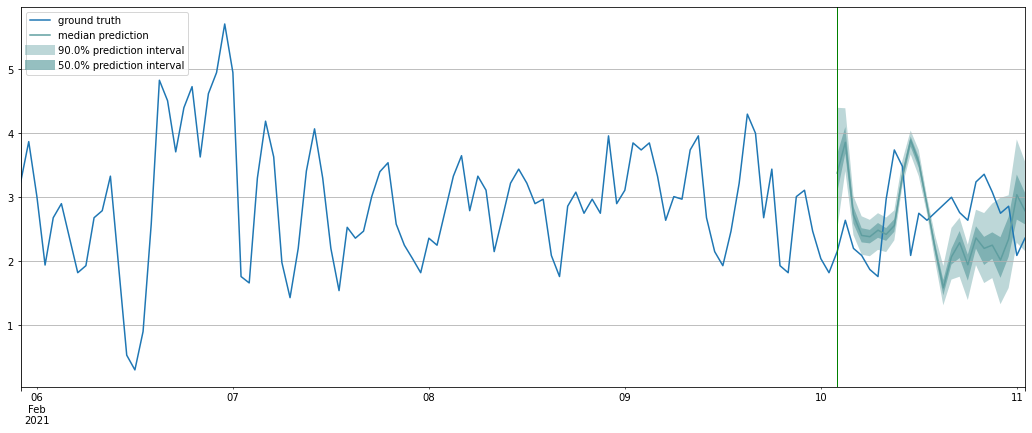

In [53]:
import matplotlib.pyplot as plt
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = context_length + prediction_length
    prediction_intervals = (50.0, 90.0)
    legend = ["ground truth", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(18, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='cadetblue')
    plt.axvline(forecast_entry.start_date, color='g', lw=1) # end of train dataset
    plt.grid(which="major")
    plt.legend(legend, loc="upper left")
    plt.show();
    
plot_prob_forecasts(tss[0], forecasts[0])

Running evaluation: 3140it [00:00, 6746.25it/s]


{
    "MSE": 2465.2449567358467,
    "abs_error": 48317.25492531061,
    "abs_target_sum": 41431.396397948265,
    "abs_target_mean": 3.298678057161486,
    "seasonal_error": 1.5226661060013333,
    "MASE": 3.06787433974674,
    "MAPE": 1.1325637192139106,
    "sMAPE": 0.602810193311162,
    "MSIS": 103.47079879690698,
    "QuantileLoss[0.1]": 23210.576139622928,
    "Coverage[0.1]": 0.4660031847133758,
    "QuantileLoss[0.5]": 48317.25470238924,
    "Coverage[0.5]": 0.10541401273885351,
    "QuantileLoss[0.9]": 23043.425818252563,
    "Coverage[0.9]": 0.8944267515923567,
    "RMSE": 49.65123318444212,
    "NRMSE": 15.051857842461605,
    "ND": 1.1661990453139384,
    "wQuantileLoss[0.1]": 0.5602170855330463,
    "wQuantileLoss[0.5]": 1.1661990399334445,
    "wQuantileLoss[0.9]": 0.5561826977039496,
    "mean_absolute_QuantileLoss": 31523.75222008824,
    "mean_wQuantileLoss": 0.7608662743901468,
    "MAE_Coverage": 0.2553874734607218,
    "OWA": NaN
}
